In [6]:
# %matplotlib notebook
# %matplotlib inline
%matplotlib widget

import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick

import sys
sys.path.append( '../src/' )

from mpl_toolkits.mplot3d import Axes3D
from ml.visualization import *

In [2]:
path = [ '../', 'datasets' ]
home_file = 'ds-residential-1sec.csv'
gym_file = 'ds-gym-1sec.csv'

df = pd.read_csv( os.path.join( *path, home_file ), index_col = 'date', parse_dates = [ 'date' ] ).drop( 'ven', axis = 1 )

In [3]:
df

,pre,hum,tem,occ
date,,,,
2020-05-14 21:08:39,94270.77,54.49,30.99,L
2020-05-14 21:08:40,94268.36,54.46,30.99,L
2020-05-14 21:08:41,94266.11,54.46,30.99,L
2020-05-14 21:08:42,94268.52,54.49,30.99,L
2020-05-14 21:08:43,94269.70,54.50,30.99,L
...,...,...,...,...
2020-06-04 23:08:55,94599.23,57.31,31.95,M
2020-06-04 23:08:56,94595.97,57.35,31.95,M
2020-06-04 23:08:57,94597.73,57.28,31.94,M


Text(0.5, 0.98, 'Living Room data distribution')

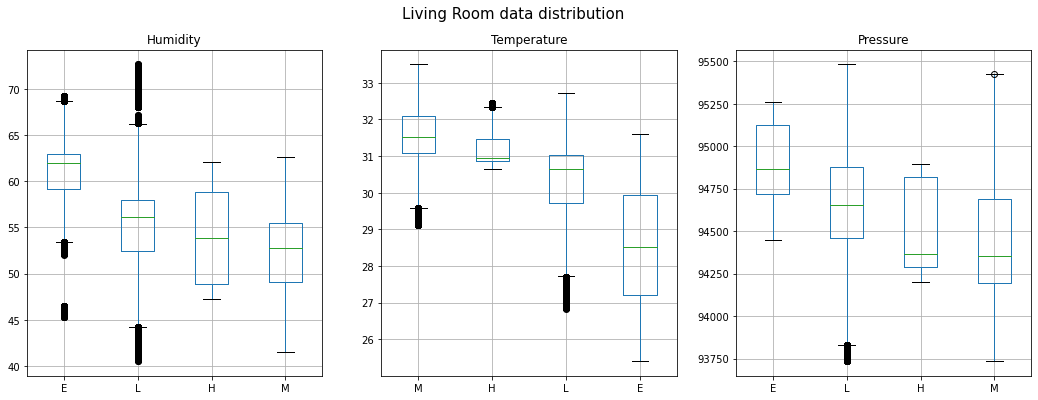

In [4]:
def plot_attr( df, attr, hue, ax, attr_name ):
    grouped = df.groupby( hue )
    temp = pd.DataFrame( { col: vals[ attr ] for col, vals in grouped } )
    means = temp.median()
    means.sort_values( ascending = False, inplace = True )
    temp = temp[ means.index ]
    g = temp.boxplot( ax = ax )
    g.set_title( attr_name )

    
fig, ax = plt.subplots( 1, 3, figsize = ( 18, 6 ) )

plot_attr( df, 'hum', 'occ', ax[ 0 ], 'Humidity' )
plot_attr( df, 'tem', 'occ', ax[ 1 ], 'Temperature' )
plot_attr( df, 'pre', 'occ', ax[ 2 ], 'Pressure' )

fig.suptitle( 'Living Room data distribution', fontsize = 15 )



KeyboardInterrupt: 

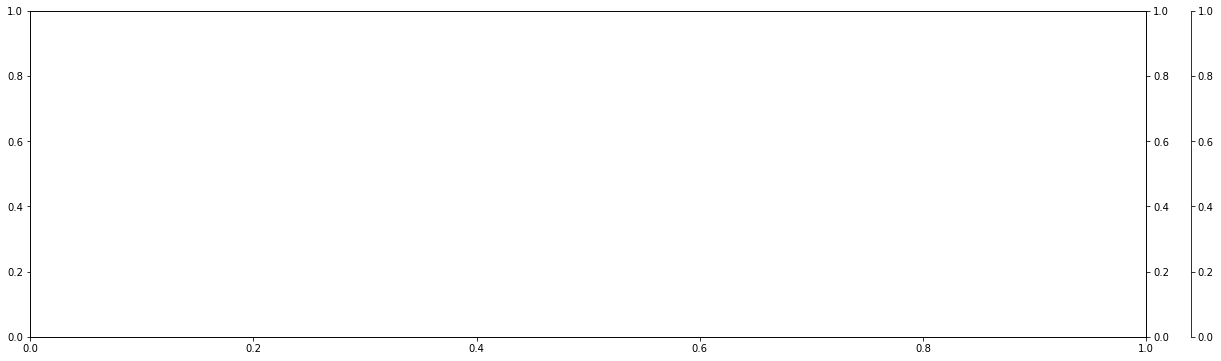

In [5]:
plot_env_vars( df.index.astype( str ), df[ 'tem' ], df[ 'hum' ], df[ 'occ' ] )

In [7]:
from collections import Counter

count = 0
for name, group in df.reset_index().groupby( pd.Grouper( key = 'date', freq = 'D' ) ):
    if( count == 0 ):
        count += 1
        print( 'day:', name )
        print( Counter( group.occ ) )
        
        fig = plt.figure( figsize = ( 10, 10 ) )
        ax = fig.add_subplot( 111, projection = '3d' )
        conf = {
            'E': { 'c': 'blue', 'm': 'o' },
            'L': { 'c': 'gold', 'm': '^' },
            'M': { 'c': 'darkorange', 'm': 's' },
            'H': { 'c': 'red', 'm': '*' }
        }
        
        for name2, group2 in group.groupby( 'occ' ):
            ax.scatter( group2.hum, group2.tem, group2.pre, 
                       c = conf[ name2 ][ 'c' ], 
                       marker = conf[ name2 ][ 'm' ] )

        fmt = '{x:,.0f}'
        tick = mtick.StrMethodFormatter( fmt )
        ax.zaxis.set_major_formatter( tick )
            
        ax.set_xlabel( 'Humidity' )
        ax.set_ylabel( 'Temperature' )
        ax.set_zlabel( 'Pressure' )
        fig.suptitle( 'Living Room Temperature, Humidity, and Pressure' )

        plt.show()

day: 2020-05-14 00:00:00
Counter({'L': 6528, 'H': 2194, 'M': 1492})


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

day: 2020-05-31 00:00:00
Counter({'H': 1731, 'L': 1208, 'M': 1194})


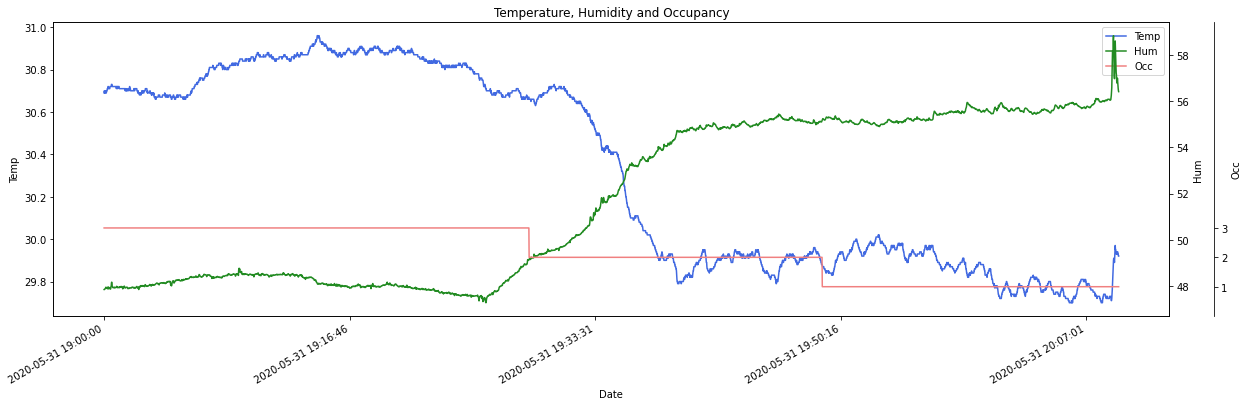

In [6]:
from collections import Counter

count = 0
for name, group in df.reset_index().groupby( pd.Grouper( key = 'date', freq = 'D' ) ):
    if( count == 17 ):
        
        print( 'day:', name )
        print( Counter( group.occ ) )
        
        plot_env_vars( group.date.astype( str ), group[ 'tem' ], group[ 'hum' ], group[ 'occ' ] )
    count += 1
        